<a href="https://colab.research.google.com/github/shivaprajapati34390-netizen/ML-project/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1)
mnist.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X,y=mnist["data"],mnist["target"]
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

In [4]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit= X.iloc[0].values
some_digit_image=some_digit.reshape(28,28)

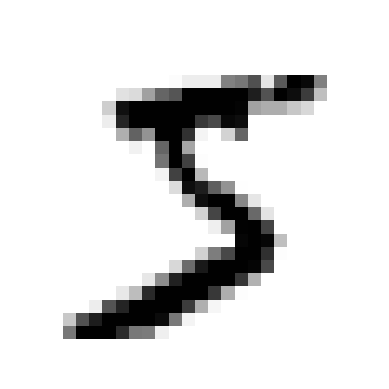

In [5]:
plt.imshow(some_digit_image,cmap="binary")
plt.axis("off")
plt.show()

In [6]:
y[0]

'5'

In [7]:
import numpy as np
y=y.astype(np.uint8)

In [8]:
X_train,X_test,y_train,y_test=X[:60000],X[:60000:],y[:60000],y[60000:]

In [9]:
y_train_5 = (y_train == 5) # true for all 5s False for all other digits
y_test_5 = (y_test == 5)

In [10]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [11]:
sgd_clf.predict([some_digit])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

## implementing cross-validation

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [13]:
from sklearn.base import BaseEstimator


In [14]:
import numpy as np
class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        return self
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

# find out the model accuracy

In [15]:
never_5_clf=Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [16]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

# confusion matrix

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [18]:
y_train_perfect_perdiction=y_train_5 #pretecd we reached performance
confusion_matrix(y_train_5,y_train_perfect_perdiction)

array([[54579,     0],
       [    0,  5421]])

In [19]:
import numpy as np
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_pred) #==3530/(3530+687)

0.8370879772350012

In [20]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [21]:
from sklearn.metrics import f1_score

In [22]:
f1_score(y_train_5,y_train_pred)

0.7325171197343847

In [23]:
y_scores=sgd_clf.decision_function([some_digit])
y_scores

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [24]:
threshold=0


In [25]:
y_some_digit_pred=(y_scores>threshold)

In [26]:
y_some_digit_pred

array([ True])

In [27]:
threshold=8000
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([False])

In [28]:
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,
                           method="decision_function")

In [29]:
from sklearn.metrics import precision_recall_curve
precision,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)

In [30]:
# def plot_precision_recall_vs_threshold(precision,recalls,threshold):
#     plt.plot(threshold,precision[:-1],"b--",label="precision")
#     plt.plot(threshold,recalls[:-1],"g-",label="Recall")
#     [...] # highlight the threshold and add the legend,axis label,and grid
import matplotlib.pyplot as plt
import numpy as np

def plot_precision_recall_vs_threshold(precision, recall, thresholds, highlight_threshold=None):
    # Plot precision and recall vs threshold
    plt.plot(thresholds, precision[:-1], "b--", label="Precision")
    plt.plot(thresholds, recall[:-1], "g-", label="Recall")

    # Highlight a specific threshold if provided
    if highlight_threshold is not None:
        # Find the closest threshold
        idx = (np.abs(thresholds - highlight_threshold)).argmin()
        plt.plot([thresholds[idx]], [precision[idx]], "ro")  # precision point
        plt.plot([thresholds[idx]], [recall[idx]], "ro")     # recall point
        plt.text(thresholds[idx], precision[idx], f'{precision[idx]:.2f}', color='blue', fontsize=9)
        plt.text(thresholds[idx], recall[idx], f'{recall[idx]:.2f}', color='green', fontsize=9)



/tmp/ipython-input-2934258192.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


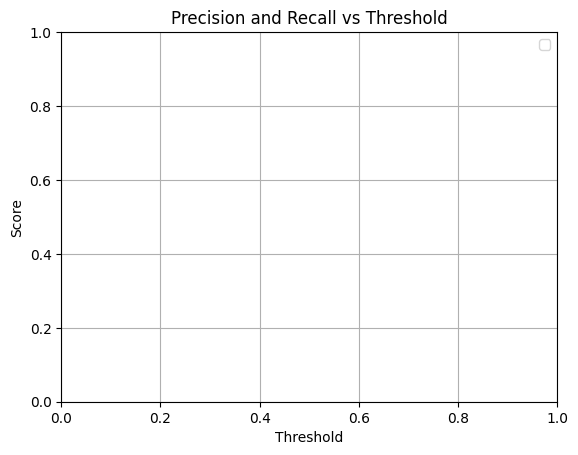

In [31]:
# Add labels, legend, and grid
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()


In [32]:
threshold_90_precision=thresholds[np.argmax(precision >= 0.90)]

In [33]:
y_train_pred_90=(y_scores >=threshold_90_precision)

In [34]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [35]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

In [36]:
from sklearn.metrics import roc_curve

In [37]:
fpr,tpr,threshold=roc_curve(y_train_5,y_scores)

In [38]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--') #dashboard digonal


In [39]:
from sklearn.model_selection import GridSearchCV

param_grid=[
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
]

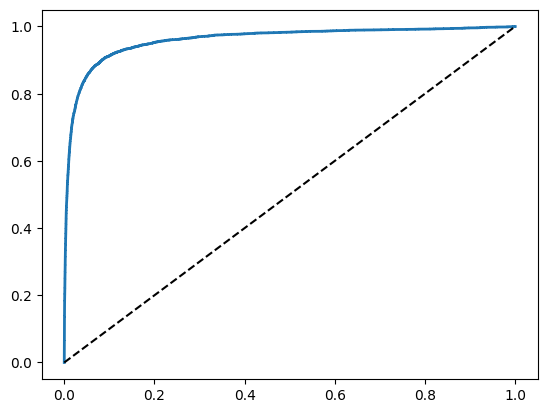

In [40]:
plot_roc_curve(fpr,tpr)
plt.show()

In [41]:
from sklearn.metrics import roc_auc_score

In [42]:
roc_auc_score(y_train_5,y_scores)

np.float64(0.9604938554008616)

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
forest_clf=RandomForestClassifier(random_state=42)
y_probas_forest=cross_val_predict(forest_clf,X_train,y_train_5,cv=3,
                                  method="predict_proba")

In [45]:
y_scores_forest=y_probas_forest[:,1] #score=proba of positive class
fpr_forest,tpr_forest,threshold_forest=roc_curve(y_train_5,y_scores_forest)

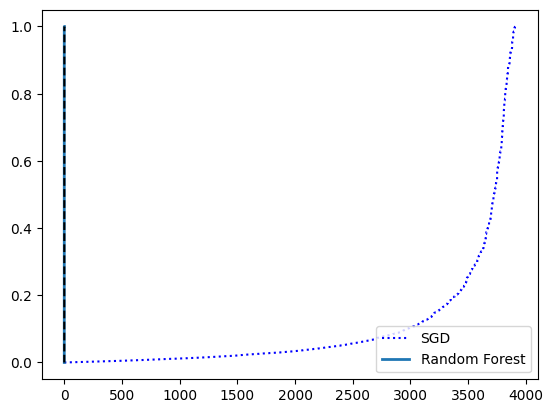

In [46]:
plt.plot(fpr,"b:",label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.legend(loc="lower right")
plt.show()

In [47]:
roc_auc_score(y_train_5,y_scores_forest)

np.float64(0.9983436731328145)

In [48]:
from sklearn.svm import SVC
svm_clf=SVC()
svm_clf.fit(X_train,y_train)
svm_clf.predict([some_digit])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [49]:
some_digit_scores=svm_clf.decision_function([some_digit])
some_digit_scores

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [50]:
np.argmax(some_digit_scores)

np.int64(5)

In [51]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [52]:
svm_clf.classes_[5]

np.uint8(5)

In [53]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf=OneVsRestClassifier(SVC())
ovr_clf.fit(X_train,y_train)

OneVsRestClassifier(estimator=SVC())

In [54]:
ovr_clf.predict([some_digit])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have va

array([5], dtype=uint8)